# Part 1: Compare the different compiler setups

In [1]:
from keras.datasets import imdb 
(train_data, train_labels),(test_data, test_labels) = imdb.load_data( num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0:20]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1])

In [4]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


In [5]:
x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [6]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])




In [9]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])


In [10]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [11]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 2s 38ms/step - loss: 0.4945 - acc: 0.7919 - val_loss: 0.3609 - val_acc: 0.8794
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2879 - acc: 0.9059 - val_loss: 0.2982 - val_acc: 0.8849
Epoch 3/20
30/30 [==============================] - 0s 8ms/step - loss: 0.2150 - acc: 0.9283 - val_loss: 0.2777 - val_acc: 0.8903
Epoch 4/20
30/30 [==============================] - 0s 7ms/step - loss: 0.1705 - acc: 0.9451 - val_loss: 0.2763 - val_acc: 0.8902
Epoch 5/20
30/30 [==============================] - 0s 7ms/step - loss: 0.1377 - acc: 0.9561 - val_loss: 0.2815 - val_acc: 0.8896
Epoch 6/20
30/30 [==============================] - 0s 7ms/step - loss: 0.1155 - acc: 0.9639 - val_loss: 0.2963 - val_acc: 0.8849
Epoch 7/20
30/30 [==============================] - 0s 7ms/step - loss: 0.0945 - acc: 0.9732 - val_loss: 0.3271 - val_acc: 0.8812
Epoch 8/20
30/30 [==============================] - 0s 7ms/step - loss: 0.0794 - acc: 0.

In [12]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

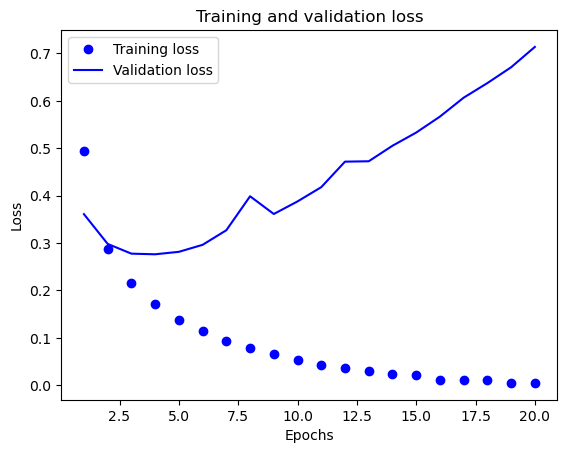

In [13]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
import numpy as np
from keras.datasets import imdb
from keras import models
from keras import layers

# Load the IMDb dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Experiment 1: Number of Hidden Layers
# One hidden layer
model_1 = models.Sequential()
model_1.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_1.add(layers.Dense(1, activation='sigmoid'))
model_1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_1 = model_1.fit(x_train, y_train, epochs=10, batch_size=512, validation_data=(x_test, y_test))

# Three hidden layers
model_3 = models.Sequential()
model_3.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_3.add(layers.Dense(16, activation='relu'))
model_3.add(layers.Dense(16, activation='relu'))
model_3.add(layers.Dense(1, activation='sigmoid'))
model_3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_3 = model_3.fit(x_train, y_train, epochs=10, batch_size=512, validation_data=(x_test, y_test))

# Experiment 2: Number of Hidden Units
# 32 hidden units
model_32 = models.Sequential()
model_32.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model_32.add(layers.Dense(32, activation='relu'))
model_32.add(layers.Dense(1, activation='sigmoid'))
model_32.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_32 = model_32.fit(x_train, y_train, epochs=10, batch_size=512, validation_data=(x_test, y_test))

# 64 hidden units
model_64 = models.Sequential()
model_64.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model_64.add(layers.Dense(64, activation='relu'))
model_64.add(layers.Dense(1, activation='sigmoid'))
model_64.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_64 = model_64.fit(x_train, y_train, epochs=10, batch_size=512, validation_data=(x_test, y_test))

# Experiment 3: Loss Function
# MSE loss function
model_mse = models.Sequential()
model_mse.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_mse.add(layers.Dense(1, activation='sigmoid'))
model_mse.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
history_mse = model_mse.fit(x_train, y_train, epochs=10, batch_size=512, validation_data=(x_test, y_test))

# Experiment 4: Activation Function
# Tanh activation function
model_tanh = models.Sequential()
model_tanh.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model_tanh.add(layers.Dense(16, activation='tanh'))
model_tanh.add(layers.Dense(1, activation='sigmoid'))
model_tanh.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_tanh = model_tanh.fit(x_train, y_train, epochs=10, batch_size=512, validation_data=(x_test, y_test))


Epoch 1/10
49/49 [==============================] - 3s 58ms/step - loss: 0.4424 - accuracy: 0.8318 - val_loss: 0.3444 - val_accuracy: 0.8826
Epoch 2/10
49/49 [==============================] - 0s 9ms/step - loss: 0.2729 - accuracy: 0.9090 - val_loss: 0.3001 - val_accuracy: 0.8843
Epoch 3/10
49/49 [==============================] - 0s 8ms/step - loss: 0.2186 - accuracy: 0.9253 - val_loss: 0.2887 - val_accuracy: 0.8836
Epoch 4/10
49/49 [==============================] - 0s 9ms/step - loss: 0.1864 - accuracy: 0.9369 - val_loss: 0.2802 - val_accuracy: 0.8888
Epoch 5/10
49/49 [==============================] - 1s 11ms/step - loss: 0.1644 - accuracy: 0.9446 - val_loss: 0.2861 - val_accuracy: 0.8858
Epoch 6/10
49/49 [==============================] - 1s 13ms/step - loss: 0.1472 - accuracy: 0.9508 - val_loss: 0.2972 - val_accuracy: 0.8832
Epoch 7/10
49/49 [==============================] - 1s 13ms/step - loss: 0.1345 - accuracy: 0.9558 - val_loss: 0.3070 - val_accuracy: 0.8805
Epoch 8/10
49/49

# Part 2:  Examine the impact of regularization and dropout. 

In [36]:
from keras import models
from keras import layers
from keras import regularizers
from keras.utils import to_categorical
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Reshape the data
x_train = x_train.reshape((60000, 28 * 28))
x_test = x_test.reshape((10000, 28 * 28))

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Create a model with L2 regularization
network = models.Sequential()
network.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

# Compile and train the model
network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_regularized = network.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/20
938/938 [==============================] - 2s 2ms/step - loss: 0.7521 - accuracy: 0.8210 - val_loss: 0.5630 - val_accuracy: 0.8468
Epoch 2/20
938/938 [==============================] - 2s 2ms/step - loss: 0.5317 - accuracy: 0.8486 - val_loss: 0.5569 - val_accuracy: 0.8321
Epoch 3/20
938/938 [==============================] - 2s 2ms/step - loss: 0.4884 - accuracy: 0.8558 - val_loss: 0.5168 - val_accuracy: 0.8440
Epoch 4/20
938/938 [==============================] - 2s 2ms/step - loss: 0.4682 - accuracy: 0.8615 - val_loss: 0.5115 - val_accuracy: 0.8406
Epoch 5/20
938/938 [==============================] - 2s 2ms/step - loss: 0.4567 - accuracy: 0.8648 - val_loss: 0.4931 - val_accuracy: 0.8526
Epoch 6/20
938/938 [==============================] - 2s 2ms/step - loss: 0.4439 - accuracy: 0.8673 - val_loss: 0.4742 - val_accuracy: 0.8546
Epoch 7/20
938/938 [==============================] - 2s 2ms/step - loss: 0.4322 - accuracy: 0.8712 - val_loss: 0.4518 - val_accuracy: 0.8634
Epoch 

In [35]:
from keras import models
from keras import layers
from keras.utils import to_categorical
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Reshape the data
x_train = x_train.reshape((60000, 28 * 28))
x_test = x_test.reshape((10000, 28 * 28))

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Create a model with dropout
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(10, activation='softmax'))

# Compile and train the model
network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_dropout = network.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/20
938/938 [==============================] - 2s 2ms/step - loss: 0.5592 - accuracy: 0.8007 - val_loss: 0.4341 - val_accuracy: 0.8435
Epoch 2/20
938/938 [==============================] - 2s 2ms/step - loss: 0.4254 - accuracy: 0.8439 - val_loss: 0.3991 - val_accuracy: 0.8578
Epoch 3/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3940 - accuracy: 0.8561 - val_loss: 0.3857 - val_accuracy: 0.8577
Epoch 4/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3753 - accuracy: 0.8618 - val_loss: 0.3666 - val_accuracy: 0.8668
Epoch 5/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3590 - accuracy: 0.8681 - val_loss: 0.3699 - val_accuracy: 0.8633
Epoch 6/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3486 - accuracy: 0.8728 - val_loss: 0.3583 - val_accuracy: 0.8701
Epoch 7/20
938/938 [==============================] - 2s 3ms/step - loss: 0.3390 - accuracy: 0.8750 - val_loss: 0.3611 - val_accuracy: 0.8718
Epoch 

Observations and Justification:

Regularization:
The impact of regularization can be observed by comparing the accuracy and overfitting in the regularized model (history_regularized) with the unregularized model. Regularization should help prevent overfitting.
You can tune the regularization factor (0.001 in this case) to see how it affects the trade-off between training and test accuracy. A higher value would introduce stronger regularization.
Regularization typically helps improve generalization, reducing overfitting in the test dataset. You should see a smaller gap between training and test accuracy in the regularized model.

Dropout:
The impact of dropout can be observed by comparing the accuracy and overfitting in the dropout model (history_dropout) with the model without dropout. Dropout should also help prevent overfitting.
The dropout rate (0.5 in this case) can be adjusted to control the fraction of neurons dropped during training. A higher rate introduces more dropout.
Dropout can help improve test accuracy by reducing overfitting. You should observe that the model with dropout has a smaller gap between training and test accuracy compared to the model without dropout.




In both cases, the goal is to reduce overfitting, and the choice of regularization factor or dropout rate depends on the specific dataset and model complexity. By using these techniques, you should achieve more robust models that generalize better to unseen data.